In [1]:
# import packages
import pyzbar.pyzbar as pyzbar
import argparse
import cv2
from matplotlib import pyplot as plt
import imutils

Rotating 40 degrees...
Rotating 50 degrees...
Rotating 60 degrees...
[INFO] Found EAN13 barcode: 3017620421006


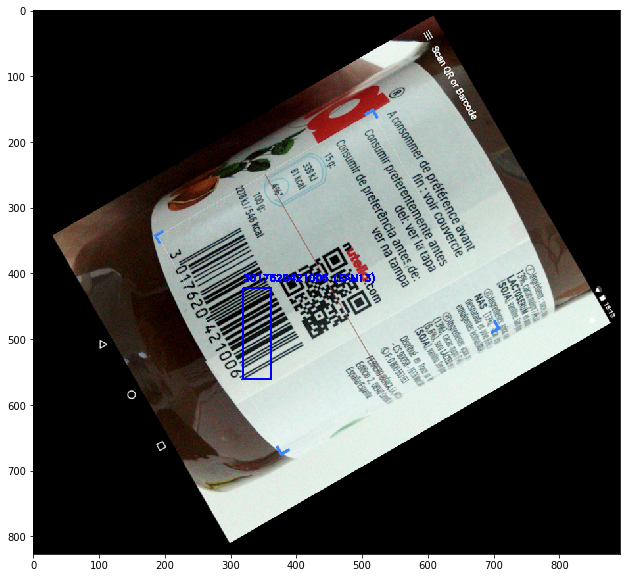

In [59]:
# load the input image
inputImage = cv2.imread('./barcode5.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)

for i in range(40, 180, 10):
    # Rotate image to find barcodes
    image = imutils.rotate_bound(inputImage, i) 
    
    # find the barcodes in the image and decode each of the barcodes
    barcodes = pyzbar.decode(image)
    
    print("Rotating {} degrees...".format(i))
    
    # loop over the detected barcodes
    for barcode in barcodes:
        barcodeType = barcode.type
        
        # Comment out to detect QR codes
        if barcodeType == "QRCODE":
            continue    

        # the barcode data is a bytes object so if we want to draw it on
        # our output image we need to convert it to a string first
        barcodeData = barcode.data.decode("utf-8")    
        
        # extract the bounding box location of the barcode and draw the
        # bounding box surrounding the barcode on the image
        (x, y, w, h) = barcode.rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # draw the barcode data and barcode type on the image
        text = "{} ({})".format(barcodeData, barcodeType)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # print the barcode type and data to the terminal
        print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))        
        
        break        
    else:
        continue    
    break
 
    
# show the output image
plt.figure(figsize = (100,10))
plt.imshow(image)
plt.show()